# Mean-Shift Clustering

Mean Shift is sliding-window algorithm that attempts to find dense areas of data points. Using a sliding window, the algorithm defines a cluster with the highest density.

### When To Use
* Can be create clusters based on the distances of data points
* Can cluster based on a defined set of clusters
* No need for cluster selection
* Intuative for data selection
* Can be used for predictions
<br>

### How Does it Work
* The algorithm starts by selecting a few random points and creates a window on each point
* Each window will mean-shift towards regions with higher density. 
* When each window cannot move anymore, the window defines a cluster point
<br>

### Params
* radius: the size of the sliding window
<br>

### Results 
* The algorithm will generate clusters based on the above params
<br>


### Limitations
* Algorithm uses a stochastic starting point
* Can be affected by outliers and noise
* Algorithm uses distance formula causing clusters to take a globular shape
    * With arbitrary shaped clusters, algorithm tends to fail
* Hypertuning the radius can impact results

In [10]:
#imports
import numpy as np 
from sklearn.cluster import MeanShift 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
import random

## Attempt 1: Aribtrary Shaped Clusters

In [11]:
#Creating an Example Data Set

random.seed(0)

#4 distinct clusters

#Cluster 1 is a region of tight points
cluster_1 = -10 * np.random.rand(100,2) 

#Cluster 2 is the function f(x) = -.01x^2 + .5x + sin(x)+15 where 0 <= x <= 100
cluster_2 = []
for i in range(100):
    random_y = -.01*i**2 +.5 * i + np.sin(i) + 15 
    cluster_2.append([i, random_y])
cluster_2 = np.array(cluster_2)

#Cluster 3 is the function f(x) = -x+50 + .01*x^2 where -45<= x <= 55
cluster_3 = []
for i in range(100):
    x = i - 45
    random_y = -1*x + 50 + .02*x**2  
    cluster_3.append([i, random_y])
cluster_3 = np.array(cluster_3)

#Cluster 4 is a circle defined by (x-60)^2 + (y+25)^2 = 100
cluster_4 = []
for i in range(50):
    x = .4*i +50
    random_y_pos = (100-(x-60)**2)**.5 -25 
    random_y_neg = -1* (100-(x-60)**2)**.5 -25 
    cluster_4.append([x, random_y_pos])
    cluster_4.append([x, random_y_neg])
cluster_4 = np.array(cluster_4)

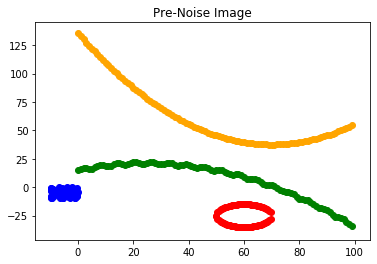

In [12]:
#Pre-Noise Image
fig, ax = plt.subplots()
ax.set_title("Pre-Noise Image")
plt.scatter(cluster_1[ : , 0], cluster_1[ :, 1], color = 'blue')
plt.scatter(cluster_2[ : , 0], cluster_2[ :, 1], color = 'green')
plt.scatter(cluster_3[ : , 0], cluster_3[ :, 1], color = 'orange')
plt.scatter(cluster_4[ : , 0], cluster_4[ :, 1], color = 'red')

In [13]:
#Adding Noise Mask
#Assuming a bivariate normal noise distribution with a mean of 0 and variance of 2
x_noise = np.random.normal(0,2,100)
y_noise = np.random.normal(0,2,100)
noise = []
for i in range(100):
    noise.append([x_noise[i], y_noise[i]])
noise = np.array(noise)

noisy_cluster_1 = cluster_1 + noise
noisy_cluster_2 = cluster_2 + noise
noisy_cluster_3 = cluster_3 + noise
noisy_cluster_4 = cluster_4 + noise


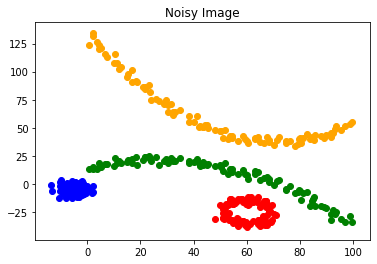

In [14]:
#Post-Noise Image
fig, ax = plt.subplots()
ax.set_title("Noisy Image")
plt.scatter(noisy_cluster_1[ : , 0], noisy_cluster_1[ :, 1], color = 'blue')
plt.scatter(noisy_cluster_2[ : , 0], noisy_cluster_2[ :, 1], color = 'green')
plt.scatter(noisy_cluster_3[ : , 0], noisy_cluster_3[ :, 1], color = 'orange')
plt.scatter(noisy_cluster_4[ : , 0], noisy_cluster_4[ :, 1], color = 'red')

In [15]:
#Creating a data array
noisy_data_array = np.zeros((400,2))
noisy_data_array[0:100, :] = noisy_cluster_1
noisy_data_array[100:200, :] = noisy_cluster_2
noisy_data_array[200:300, :] = noisy_cluster_3
noisy_data_array[300:400, :] = noisy_cluster_4

In [16]:
#Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(noisy_data_array)

In [26]:
radius = .75
meanShift = MeanShift(bandwidth = radius) 
meanShift.fit(data_scaled)
num_of_cluster = len(meanShift.cluster_centers_)
print("Found Clusters: " + str(num_of_cluster))

Found Clusters: 7


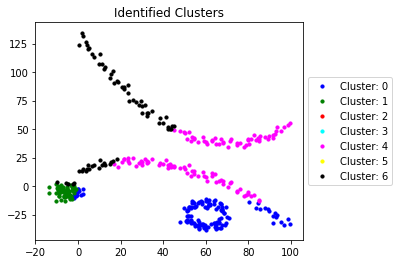

In [27]:
colored_cluster_array = []
for point in noisy_data_array:
    ans = meanShift.predict(point.reshape(1,-1))
    colored_cluster_array.append([point, ans.tolist()])
        
color_suite = []
for e in range(num_of_cluster):
    color_e = [i[0].tolist() for i in colored_cluster_array if i[1][0] == e ]
    color_ex = [i[0] for i in color_e]
    color_ey = [i[1] for i in color_e]
    color_suite.append([color_ex, color_ey])
        
fig, ax = plt.subplots()
title = "Identified Clusters"
ax.set_title(title)
color_list = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
legend_list = []
cluster_list = []
i = 0
for point_array in color_suite:
    leg = ax.scatter(point_array[0], point_array[1], s = 10, color=color_list[i])
    legend_list.append(leg)
    cluster_list.append('Cluster: ' + str(i))
    i+=1
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(legend_list, cluster_list, loc='center left', bbox_to_anchor=(1, 0.5))

## Attempt 2: Globular Based Clusters

In [29]:
#Creating the Data Set

#4 distinct clusters
cluster_1 = -2 * np.random.rand(100,2)
cluster_2 =  2 * np.random.rand(100,2)
cluster_3 = -1 * np.random.rand(100,2)
cluster_4 =1 + 3 * np.random.rand(100,2)

#offsetting
cluster_1 = np.array([[i[0]-5, i[1]-5] for i in cluster_1])
cluster_2 = np.array([[i[0]+5, i[1]-5] for i in cluster_2])
cluster_3 = np.array([[i[0]-5, i[1]+5] for i in cluster_3])
cluster_4 = np.array([[i[0]+3, i[1]+5] for i in cluster_4])

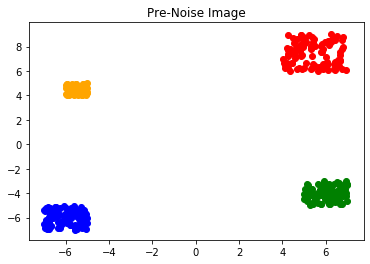

In [30]:
#Pre-Noise Image
fig, ax = plt.subplots()
ax.set_title("Pre-Noise Image")
plt.scatter(cluster_1[ : , 0], cluster_1[ :, 1], color = 'blue')
plt.scatter(cluster_2[ : , 0], cluster_2[ :, 1], color = 'green')
plt.scatter(cluster_3[ : , 0], cluster_3[ :, 1], color = 'orange')
plt.scatter(cluster_4[ : , 0], cluster_4[ :, 1], color = 'red')

In [35]:
#Adding Noise Mask
#Assuming a bivariate normal noise distribution with a mean of 0 and variance of 1
x_noise = np.random.normal(0,1,100)
y_noise = np.random.normal(0,1,100)
noise = []
for i in range(100):
    noise.append([x_noise[i], y_noise[i]])
noise = np.array(noise)

noisy_cluster_1 = cluster_1 + noise
noisy_cluster_2 = cluster_2 + noise
noisy_cluster_3 = cluster_3 + noise
noisy_cluster_4 = cluster_4 + noise


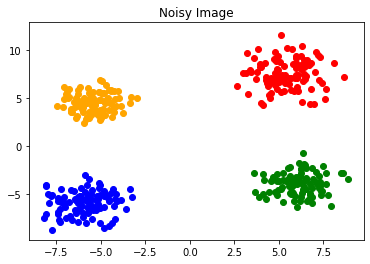

In [36]:
#Post-Noise Image
fig, ax = plt.subplots()
ax.set_title("Noisy Image")
plt.scatter(noisy_cluster_1[ : , 0], noisy_cluster_1[ :, 1], color = 'blue')
plt.scatter(noisy_cluster_2[ : , 0], noisy_cluster_2[ :, 1], color = 'green')
plt.scatter(noisy_cluster_3[ : , 0], noisy_cluster_3[ :, 1], color = 'orange')
plt.scatter(noisy_cluster_4[ : , 0], noisy_cluster_4[ :, 1], color = 'red')

In [37]:
#Creating a data array
noisy_data_array = np.zeros((400,2))
noisy_data_array[0:100, :] = noisy_cluster_1
noisy_data_array[100:200, :] = noisy_cluster_2
noisy_data_array[200:300, :] = noisy_cluster_3
noisy_data_array[300:400, :] = noisy_cluster_4

In [38]:
#Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(noisy_data_array)

In [39]:
radius = .75
meanShift = MeanShift(bandwidth = radius) 
meanShift.fit(data_scaled)
num_of_cluster = len(meanShift.cluster_centers_)
print("Found Clusters: " + str(num_of_cluster))

Found Clusters: 4


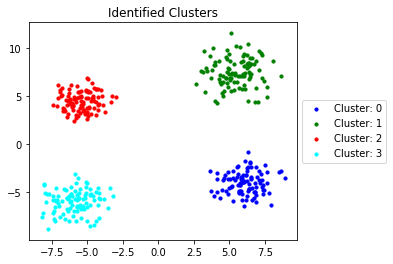

In [40]:
colored_cluster_array = []
for point in noisy_data_array:
    ans = meanShift.predict(point.reshape(1,-1))
    colored_cluster_array.append([point, ans.tolist()])
        
color_suite = []
for e in range(num_of_cluster):
    color_e = [i[0].tolist() for i in colored_cluster_array if i[1][0] == e ]
    color_ex = [i[0] for i in color_e]
    color_ey = [i[1] for i in color_e]
    color_suite.append([color_ex, color_ey])
        
fig, ax = plt.subplots()
title = "Identified Clusters"
ax.set_title(title)
color_list = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
legend_list = []
cluster_list = []
i = 0
for point_array in color_suite:
    leg = ax.scatter(point_array[0], point_array[1], s = 10, color=color_list[i])
    legend_list.append(leg)
    cluster_list.append('Cluster: ' + str(i))
    i+=1
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(legend_list, cluster_list, loc='center left', bbox_to_anchor=(1, 0.5))